# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [1]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Load the data
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements
df['ds'] = pd.to_datetime(df['ds'])  # Convert to datetime



  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)


FileNotFoundError: [Errno 2] No such file or directory: 'multiTimeline.csv'

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [7]:
print(df.head())

          ds   y
0 2004-01-01  11
1 2004-02-01   9
2 2004-03-01  10
3 2004-04-01   7
4 2004-05-01   5


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns


- `ds`: The datetime column (must be in pandas datetime format)
- `y`: The numeric values we want to forecas 'y'
})
ns

In [20]:
# Convert ds column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Check for missing values
print("Missing values check:")
print(df.isnull().sum())

# Handle any missing values (if present)
if df['y'].isnull().any():
    print("\nInterpolating missing values...")
    df['y'] = df['y'].interpolate()
    
# Verify the final dataframe structure
print("\nFirst 5 rows after preprocessing:")
display(df.head())

print("\nData types:")
print(df.dtypes)



Missing values check:
ds    0
y     0
dtype: int64

First 5 rows after preprocessing:


,ds,y
0,2004-01-01,11
1,2004-02-01,9
2,2004-03-01,10
3,2004-04-01,7
4,2004-05-01,5



Data types:
ds    datetime64[ns]
y              int64
dtype: object


## Plotting the data

👇 Plot the data

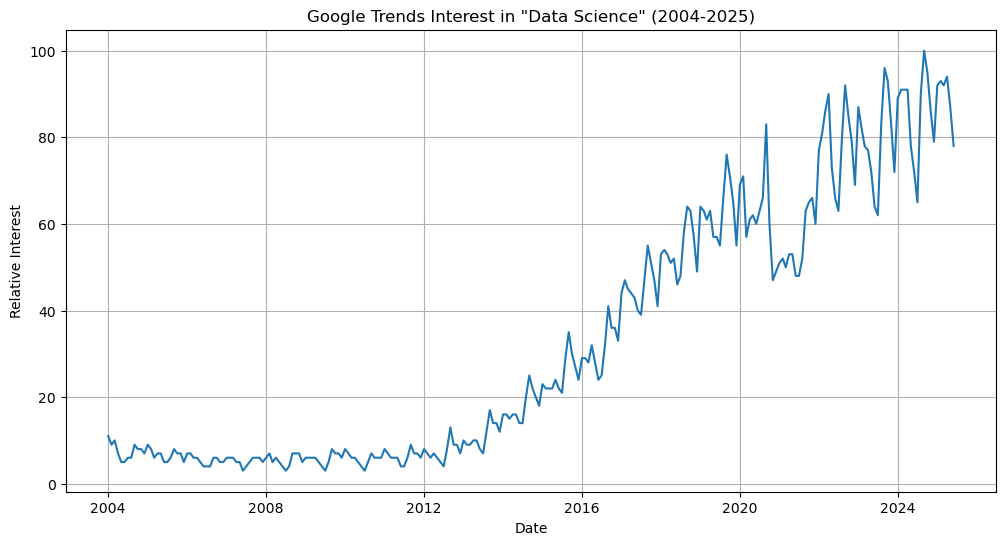

In [9]:
# Plot the raw data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'])
plt.title('Google Trends Interest in "Data Science" (2004-2025)')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.grid(True)
plt.show()

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [11]:
#from fbprophet import Prophet
# Split the data
train = df[df['ds'] < '2021-01-01']
test = df[df['ds'] >= '2021-01-01']

# Initialize and fit the model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(train)

13:43:20 - cmdstanpy - INFO - Chain [1] start processing
13:43:21 - cmdstanpy - INFO - Chain [1] done processing


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [12]:
# Create future dataframe for 2 years beyond the test set
future = model.make_future_dataframe(periods=24, freq='M')  # 24 months = 2 years

# Make predictions
forecast = model.predict(future)

## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

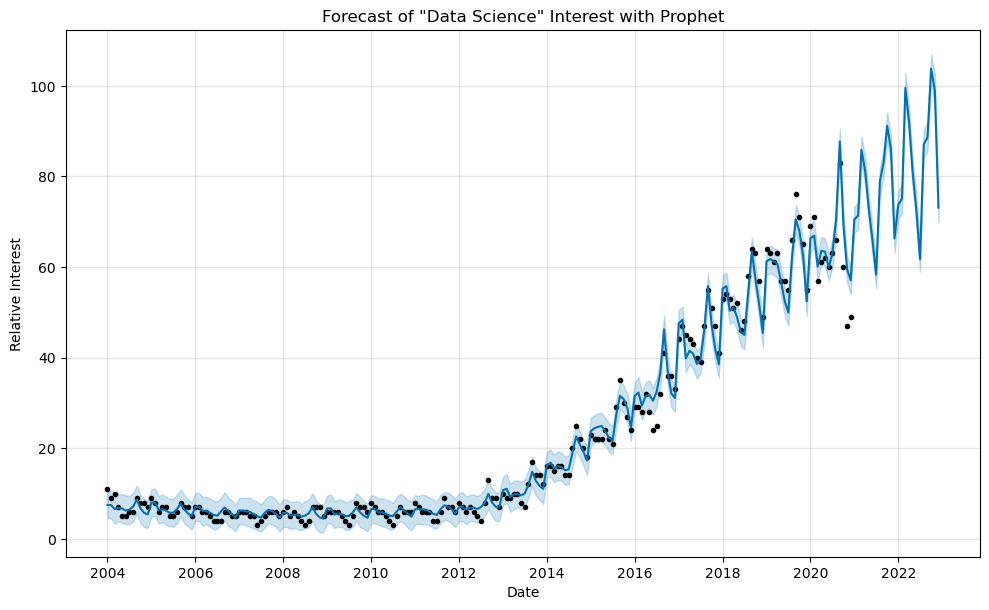

In [13]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Forecast of "Data Science" Interest with Prophet')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.show()

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

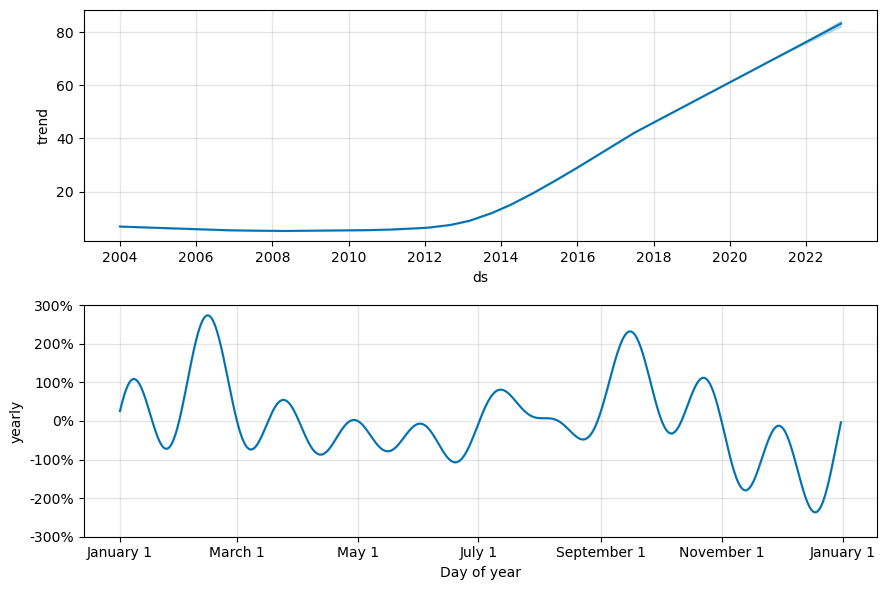

In [14]:
# Plot components
fig2 = model.plot_components(forecast)
plt.show()

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

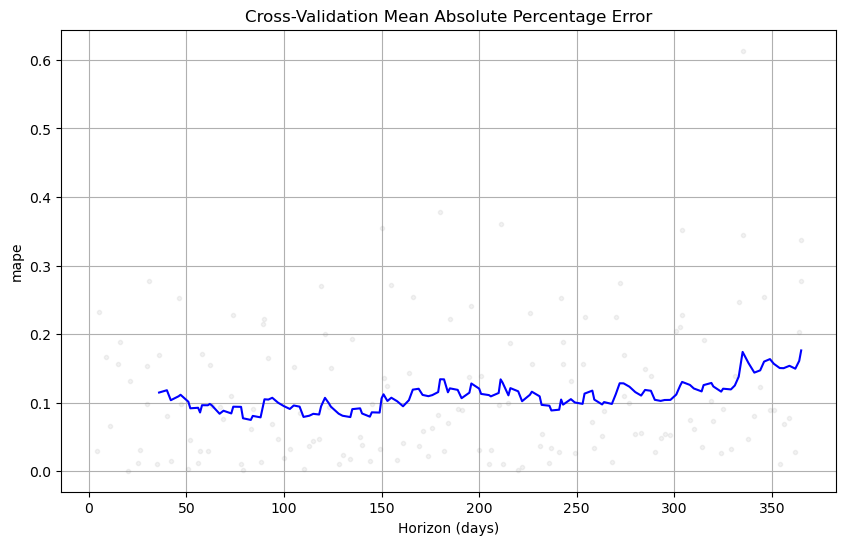

In [15]:
#from fbprophet.diagnostics import cross_validation
#from fbprophet.diagnostics import performance_metrics
# Cross-validation
df_cv = cross_validation(
    model,
    initial='3650 days',  # 10 years of training
    period='180 days',    # 6 months between folds
    horizon='365 days',   # 1 year forecasts
    parallel="processes"
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Plot the performance
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('Cross-Validation Mean Absolute Percentage Error')
plt.show()

Analysis: 
1. The interest in "data science" has grown exponentially since 2004, with particularly rapid growth after 2012.
2. There's clear yearly seasonality with peaks typically in September-October and troughs in June-July. This might correspond with academic cycles and hiring seasons.
3. The cross-validation shows the model has reasonable predictive power, though the MAPE (Mean Absolute Percentage Error) increases as the forecast horizon extends further into the future.
4. recent trends:The model captures the continued growth in interest, though the actual test data (2021-2025) shows some fluctuations that the model didn't perfectly predict, especially the dip in late 2020 and subsequent recovery.

The Prophet model is well-suited for this time series as it effectively captures both the long-term trend and yearly seasonality patterns in the data. The multiplicative seasonality assumption works well here as the seasonal fluctuations grow proportionally with the overall trend.

⚠️ Don't forget to push the challenge to GitHub once you're done 😄